# Bayesian A/B Testing

In [1]:
import sys
print(sys.executable)
print(sys.version)

/Users/kazutak/Git/AB_test/.venv/bin/python
3.9.9 (main, Apr 22 2023, 13:11:31) 
[Clang 14.0.0 (clang-1400.0.29.202)]


In [2]:
import numpy as np
from matplotlib import pyplot as plt

%config InlineBackend.figure_format = 'retina'

## ÂïèÈ°åË®≠ÂÆö

Q. Alice „Å® Bob „ÅÆ„É¨„Éù„Éº„Éà„ÅØ„ÄÅ„Å©„Å£„Å°„Åå‰ø°È†º„Åß„Åç„ÇãÁµêÊûúÔºü

| Alice „ÅÆ„É¨„Éù„Éº„Éà | A„Éë„Çø„Éº„É≥ | B„Éë„Çø„Éº„É≥ |
| :--- | :--: | :--: |
| UU | 40 | 50 |
| CV | 2 | 4 |
| UU CVR | 5% | 8% |

| Bob „ÅÆ„É¨„Éù„Éº„Éà | A„Éë„Çø„Éº„É≥ | B„Éë„Çø„Éº„É≥ |
| :--- | :--: | :--: |
| UU | 1280 | 1600 |
| CV | 64 | 128 |
| UU CVR | 5% | 8% |

## Ë°®Ë®ò
+ $ \theta $ : „Åù„ÅÆÁæ§Âõ∫Êúâ„ÅÆCVÁéáÔºàÊú¨Êù•„ÅØÈÄ£Á∂öÂÄ§„Å†„Åå„ÄÅÈõ¢Êï£ÁØÑÂõ≤„ÇíÁ¥∞„Åã„ÅèÂàá„Å£„Å¶Ë°®ÁèæÔºâ`thetas`
+ $ r $ : CV„ÅÇ„Çä = 1„ÄÅ CV„Å™„Åó = 0 `r`
+ $ p(\theta) $ : „Éá„Éº„Çø„ÇíË¶≥Ê∏¨„Åô„ÇãÂâç„ÅÆ $\theta$ „ÅÆ‰∫ãÂâçÂàÜÂ∏É„ÄÅ‰ø°Âøµ `p`
+ $ p(\theta | D) $ : „Éá„Éº„Çø„ÇíË¶≥Ê∏¨„Åó„ÅüÂæå„ÅÆ $\theta$ „ÅÆ‰∫ãÂæåÂàÜÂ∏É„ÄÅ‰ø°Âøµ `p`
+ ‰∫ãÂâçÂàÜÂ∏ÉÔºö‰∏ÄÊßòÂàÜÂ∏É„ÇíÂâçÊèê„Å®„Åó„ÄÅ`r` „Å´„Çà„Å£„Å¶Êõ¥Êñ∞„Åï„Çå„Çã„Çà„ÅÜÈñ¢Êï∞ÂÆöÁæ© `posterior(r, prior)`

In [3]:
thetas = np.linspace(0, 1, 1001)

likelihood = lambda r: thetas if r else (1 - thetas)

def posterior(r, prior):
    lp = likelihood(r) * prior
    return lp / lp.sum()

In [4]:
# ‰∏ÄÊßòÂàÜÂ∏É„ÇíÂâçÊèê„Å®„Åó„Å¶„ÄÅthetas „ÅÆË¶ÅÁ¥†Êï∞„ÅßÂùáÁ≠â„Å´ÂÄ§„ÇíÂàÜ„Åë„Å¶„É™„Çπ„ÉàÂåñÔºàÁ¢∫Áéá„ÅÆÂâçÊèê„Çà„Çä ÂêàË®à = 1Ôºâ
p = np.array([1 / len(thetas) for _ in thetas])

## ‰ø°Âøµ $p$ „Çí„Éô„Ç§„Ç∫Êõ¥Êñ∞

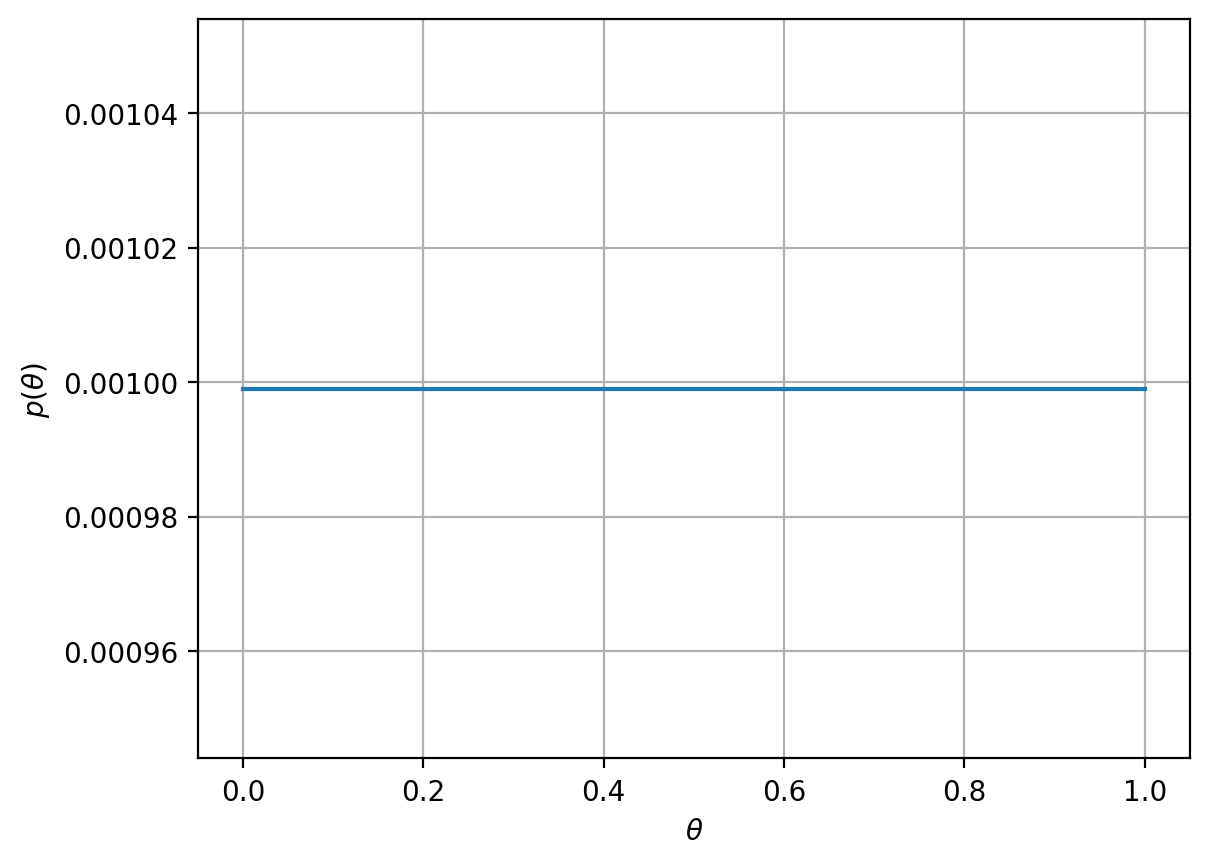

In [5]:
# ÂàùÊúüÂÄ§
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.grid()
plt.show()

In [6]:
# ‰∏ÄÂ∫¶„Å†„Åë„Éô„Ç§„Ç∫Êõ¥Êñ∞„Çí„Åó„Å¶„Åø„Çã
p_1 = posterior(1, p)

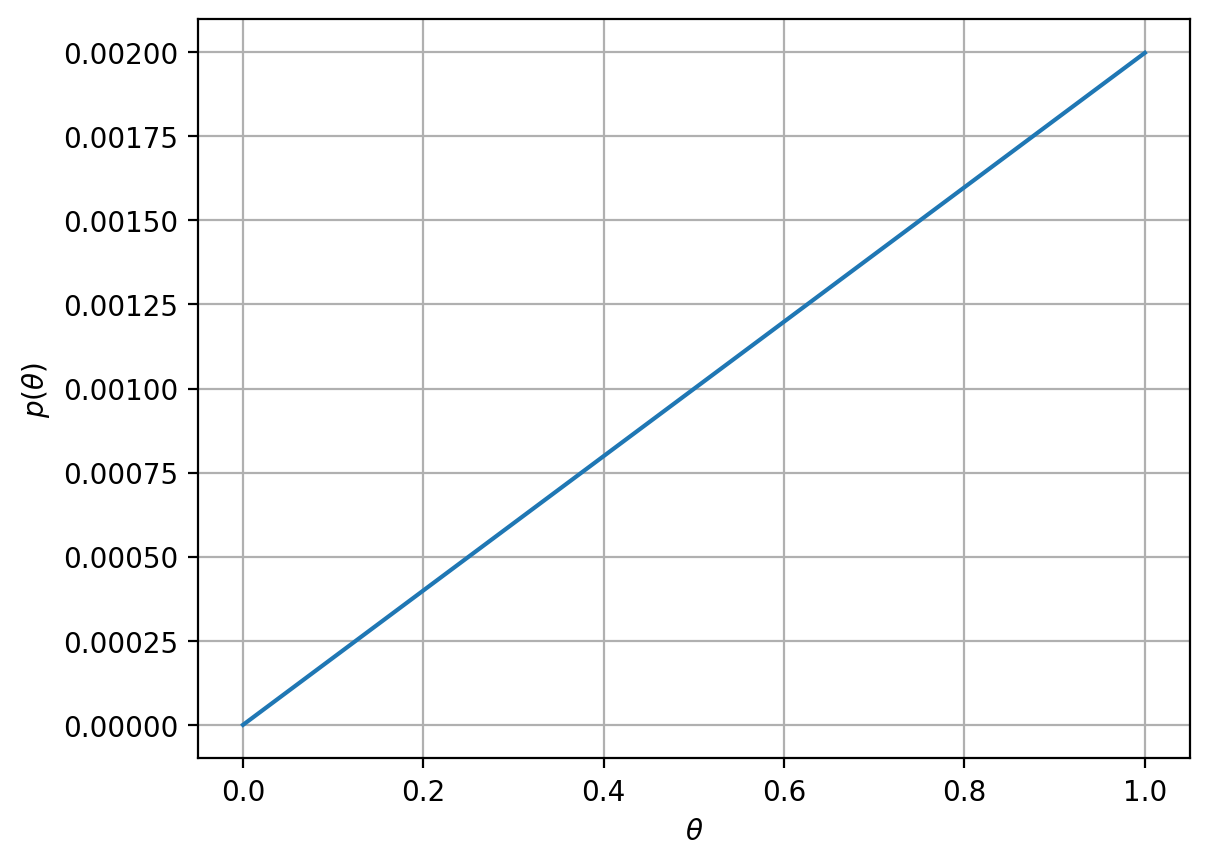

In [7]:
# ÂàùÊúüÂÄ§
plt.plot(thetas, p_1)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.grid()
plt.show()

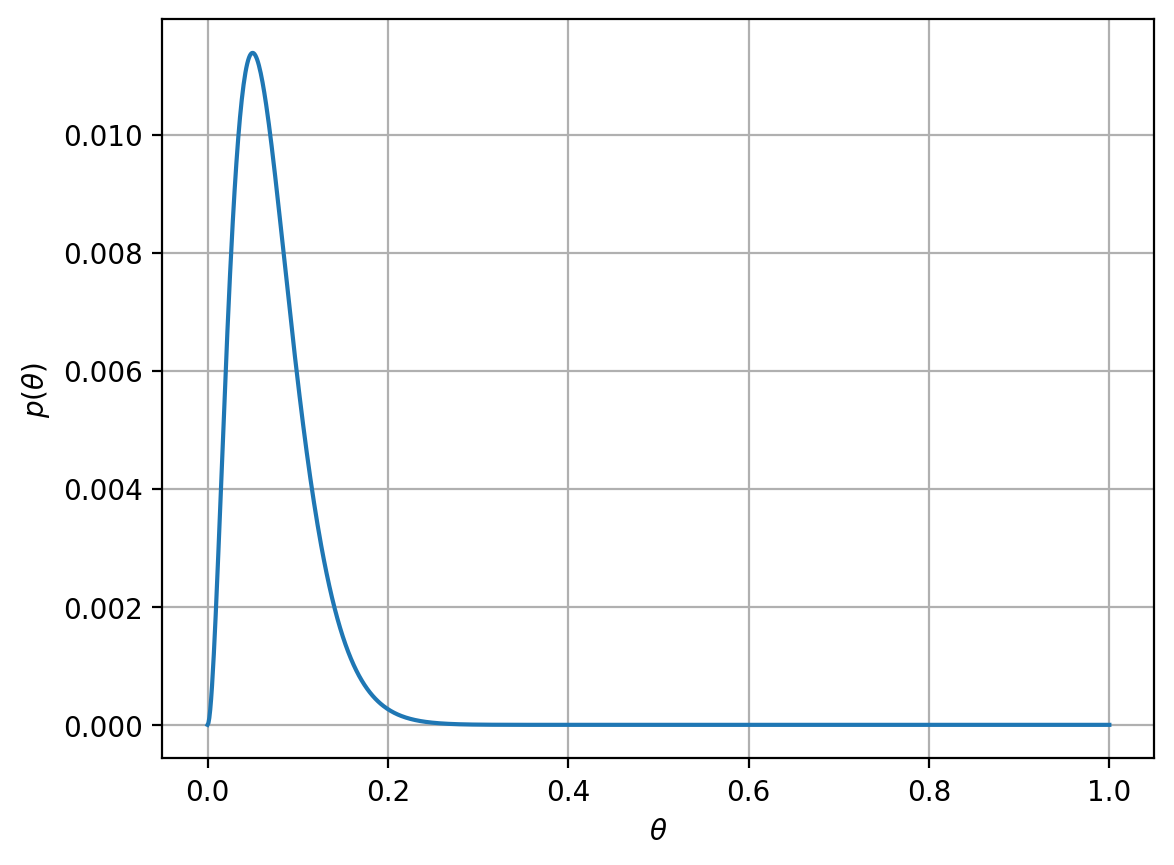

In [8]:
# Alice „ÅÆ„É¨„Éù„Éº„Éà A„Éë„Çø„Éº„É≥ „Å´„ÅÇ„ÇãCVÊï∞„ÄÅÈùûCVÊï∞„ÇíÂÖÉ„Å´‚Äù‰ø°Âøµ‚Äù„Çí„Éô„Ç§„Ç∫Êõ¥Êñ∞„Åó„Å¶„Åø„Çã
cv_cnt = 2
non_cv_cnt = 38

# ‰∏ÄÊßòÂàÜÂ∏É„ÇíÂâçÊèê„Å®„Åó„Å¶„ÄÅthetas „ÅÆË¶ÅÁ¥†Êï∞„ÅßÂùáÁ≠â„Å´ÂÄ§„ÇíÂàÜ„Åë„Å¶„É™„Çπ„ÉàÂåñÔºàÁ¢∫Áéá„ÅÆÂâçÊèê„Çà„Çä ÂêàË®à = 1Ôºâ
p = np.array([1 / len(thetas) for _ in thetas])
for _ in range(cv_cnt):
    p = posterior(1, p)
for _ in range(non_cv_cnt):
    p = posterior(0, p)
plt.plot(thetas, p)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.grid()
plt.show()

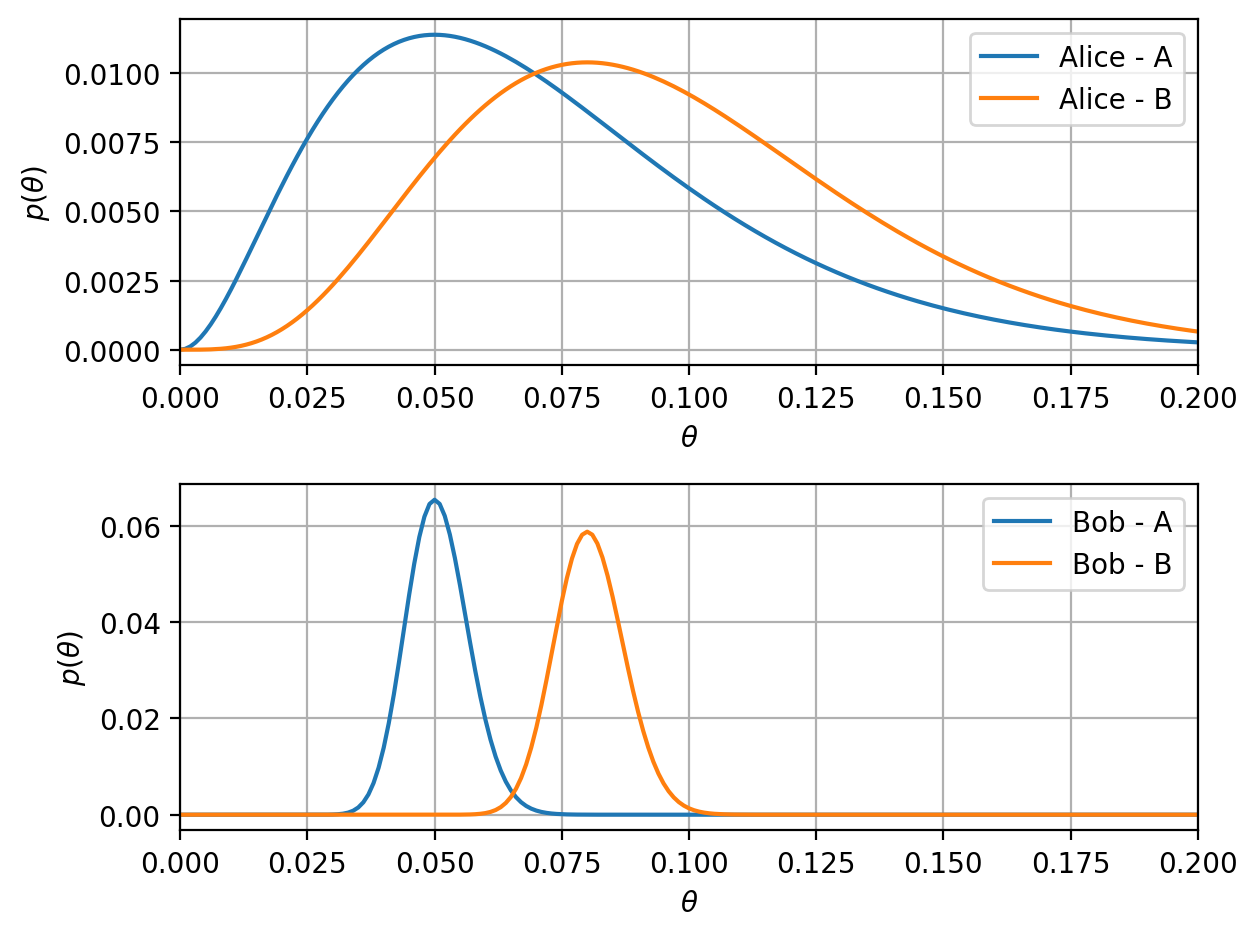

In [9]:
def draw(cv_cnt, non_cv_cnt, label):
  p = np.array([1 / len(thetas) for theta in thetas])
  for _ in range(cv_cnt):
    p = posterior(1, p)
  for _ in range(non_cv_cnt):
    p = posterior(0, p)
  plt.plot(thetas, p, label = label)
  
plt.subplot(2, 1, 1)
draw(2, 40 - 2, 'Alice - A')
draw(4, 50 - 4, 'Alice - B')
plt.xlim(0, 0.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.grid()
plt.subplot(2, 1, 2)
draw(64, 1280 - 64, 'Bob - A')
draw(128, 1600 - 128, 'Bob - B')
plt.xlim(0, 0.2)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

## Âà•Ëß£ÔºöÁπ∞„ÇäËøî„Åó„Çí„Åæ„Å®„ÇÅ„Çã

„Éô„É´„Éå„Éº„Ç§ÂàÜÂ∏É„Çí‰ªÆÂÆö„Åó„Å¶CV„Åô„Çã„Åã„Å©„ÅÜ„Åã„ÇíUUÊØé„Å´„Éô„Ç§„Ç∫Êõ¥Êñ∞„Åô„Çã„ÅÆ„ÅØÂ§ßÂ§â„Åù„ÅÜ„Å™„ÅÆ„Åß„ÄÅ„Åæ„Å®„ÇÅ„Å¶‰∫åÈ†ÖÂàÜÂ∏É„ÇíÊÉ≥ÂÆö„Åó„ÅüÊõ∏„ÅçÊñπ„Å´Â§âÊèõ„Åô„Çã<br>
„É¨„Éù„Éº„Éà„Å´Ë®ò„Åï„Çå„ÅüÊï∞Â≠óÔºà$a$ = TrueÂõûÊï∞„ÄÅ$N$ = Ë©¶Ë°åÂõûÊï∞Ôºâ„ÇíÁõ¥Êé•Âà©Áî®„Åó„Å¶Êé®Ë´ñ„Åô„Çã„Å®„ÅÑ„ÅÜÊÑèÂë≥„Åß„ÅØ„Çà„Çä„Ç®„É¨„Ç¨„É≥„Éà„Å™Ëß£Ê≥ï„Å®„ÅÑ„Åà„Çã„ÄÇ

In [10]:
likelihood = lambda a, N: thetas ** a * (1 - thetas) ** (N - a)

In [11]:
def posterior(a, N, prior):
  lp = likelihood(a, N) * prior
  return lp / lp.sum()

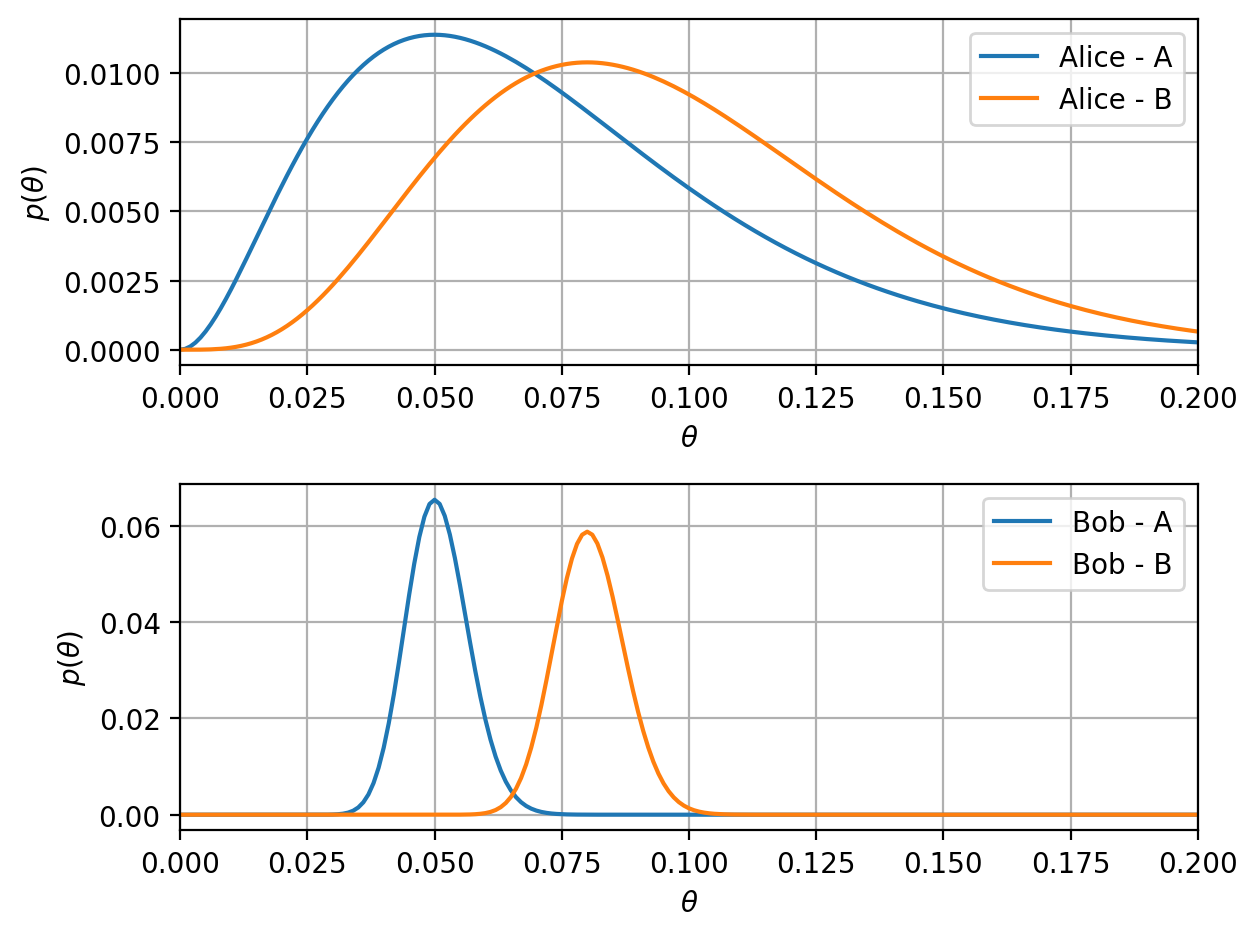

In [12]:
prior = 1 / len(thetas)
plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40, prior), label='Alice - A')
plt.plot(thetas, posterior(4, 50, prior), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280, prior), label='Bob - A')
plt.plot(thetas, posterior(128, 1600, prior), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## Âà•Ëß£ÔºöÁπ∞„ÇäËøî„Åó„Çí„Åæ„Å®„ÇÅ„Çã(„Éô„Éº„ÇøÂàÜÂ∏É)

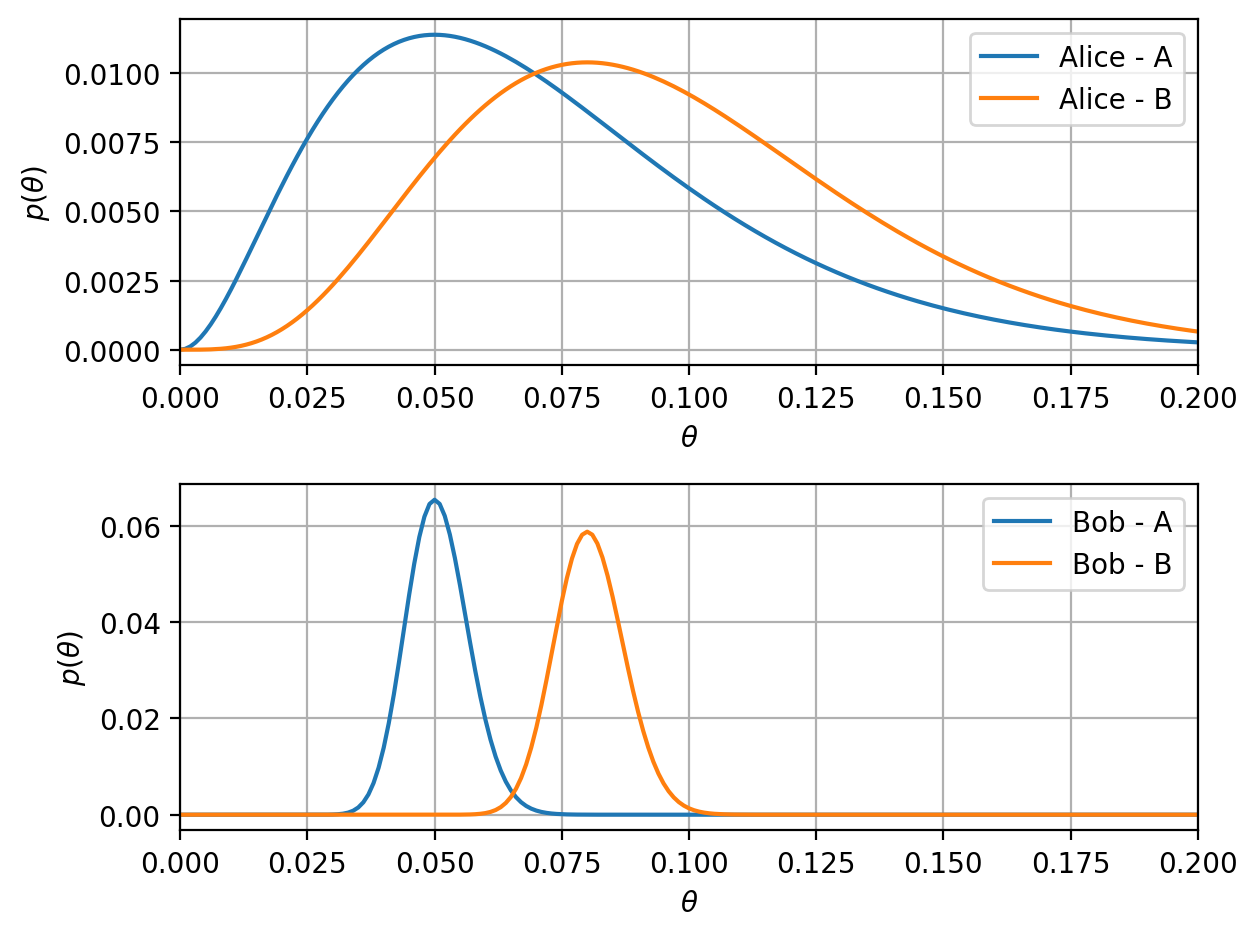

In [13]:
def betaf(alpha, beta):
  numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
  return numerator / numerator.sum()

def posterior(a, N):
  return betaf(a + 1, N - a + 1)

plt.subplot(2, 1, 1)
plt.plot(thetas, posterior(2, 40), label='Alice - A')
plt.plot(thetas, posterior(4, 50), label='Alice - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(thetas, posterior(64, 1280), label='Bob - A')
plt.plot(thetas, posterior(128, 1600), label='Bob - B')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.2)
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

## HDI

In [14]:
def hmv(xs, ps, alpha=0.95):
  xps = sorted(zip(xs, ps), key=lambda xp: xp[1], reverse=True)
  xps = np.array(xps)
  xs = xps[:, 0]
  ps = xps[:, 1]
  return np.sort(xs[np.cumsum(ps) <= alpha])

In [15]:
thetas = np.linspace(0, 1, 1001)

def posterior(a, N):
  alpha = a + 1
  beta = N - a + 1
  numerator = thetas ** (alpha - 1) * (1 - thetas) ** (beta - 1)
  return numerator / numerator.sum()

ps = posterior(2, 40)

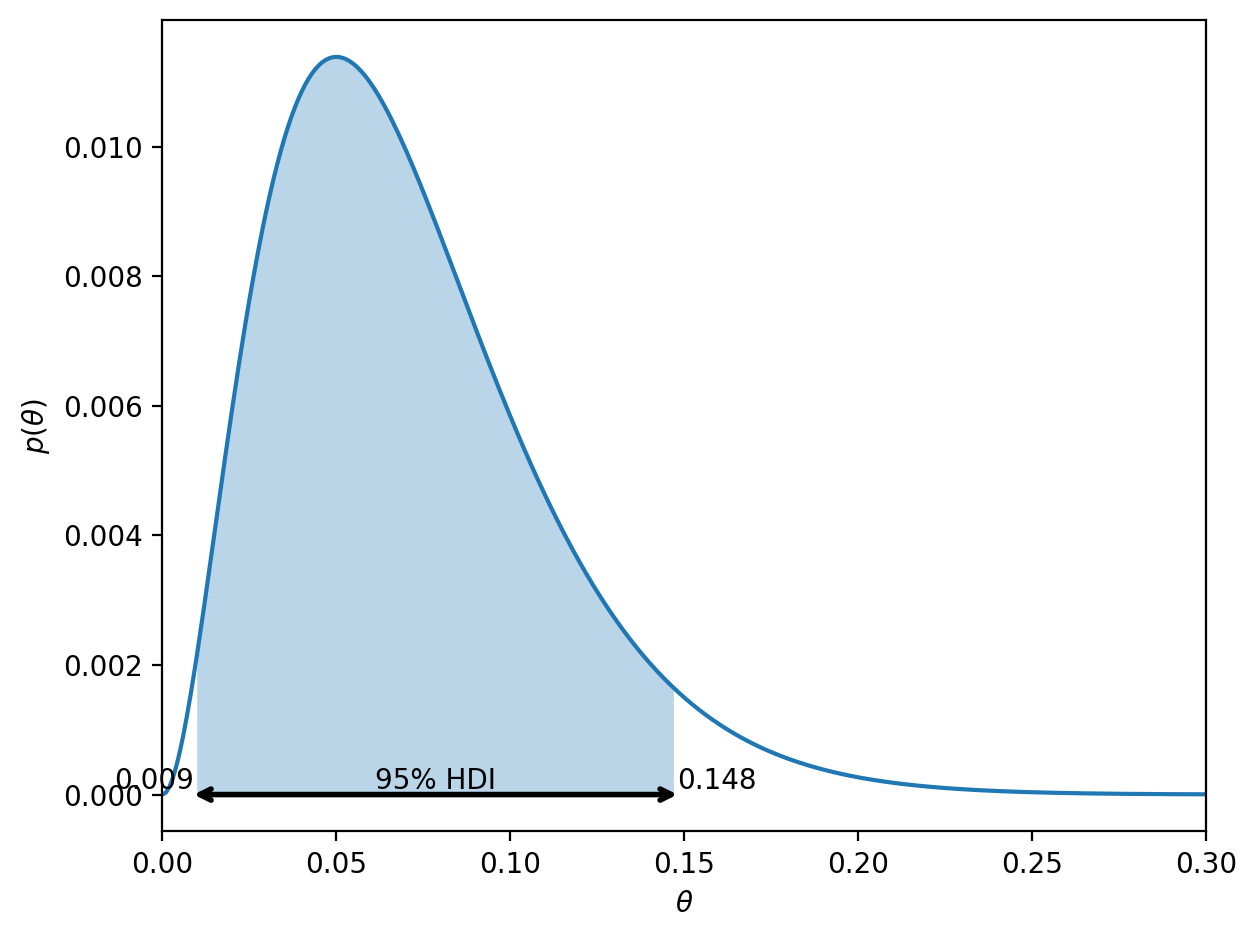

In [16]:
hm_thetas = hmv(thetas, ps, alpha=0.95)
plt.plot(thetas, ps)
plt.annotate('', xy=(hm_thetas.min(), 0),
              xytext=(hm_thetas.max(), 0),
              arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                              arrowstyle='<->', linewidth=2))
plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
              ha='right', va='bottom')
plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
              ha='left', va='bottom')
plt.annotate('95% HDI', xy=(hm_thetas.mean(), 0),
              ha='center', va='bottom')
hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
plt.xlabel(r'$\theta$')
plt.ylabel(r'$p(\theta)$')
plt.xlim(0, 0.3)
plt.tight_layout()
plt.show()

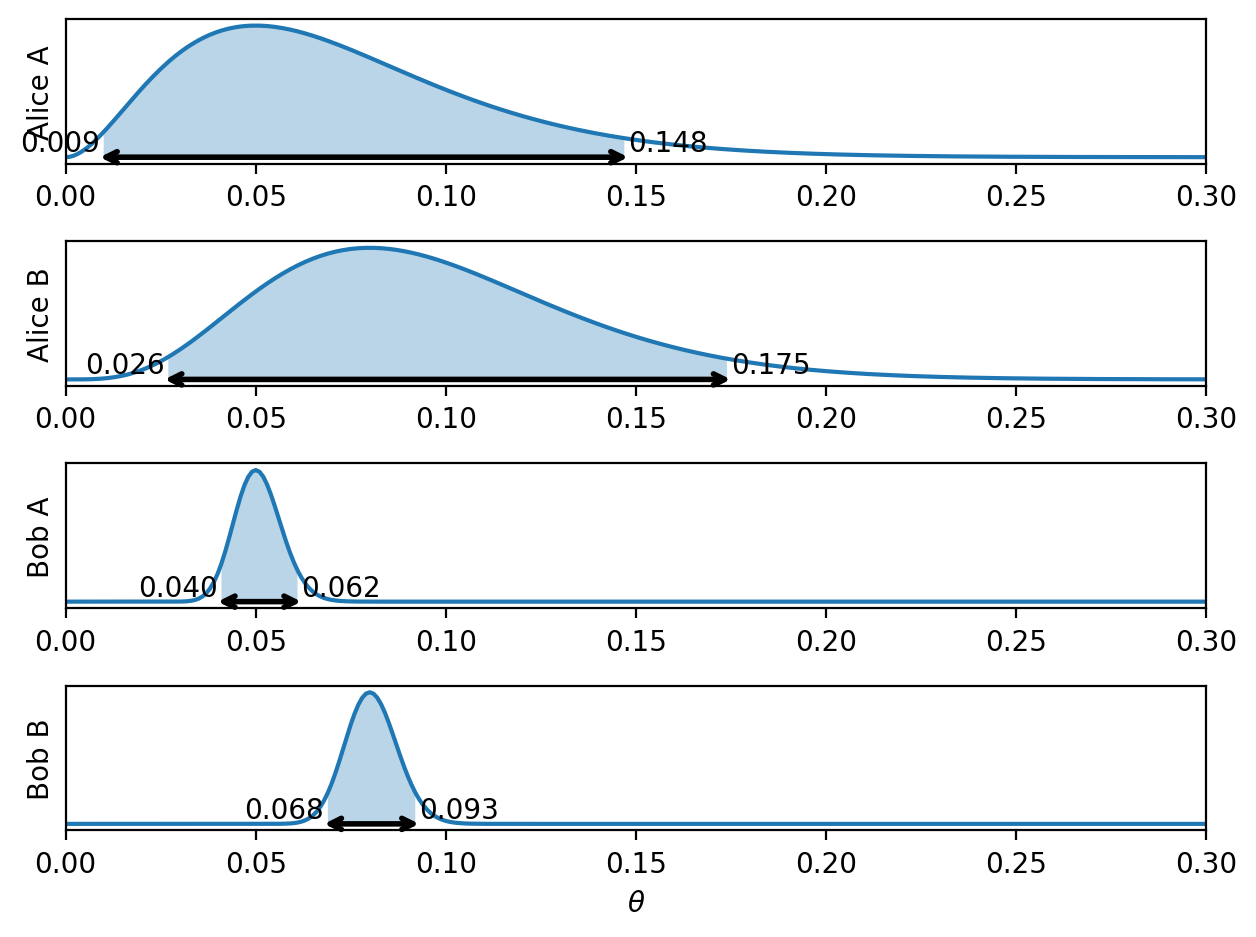

In [17]:
def plot_hdi(ps, label):
  hm_thetas = hmv(thetas, ps, 0.95)
  plt.plot(thetas, ps)
  plt.annotate('', xy=(hm_thetas.min(), 0),
                xytext=(hm_thetas.max(), 0),
                arrowprops=dict(color='black', shrinkA=0, shrinkB=0,
                                arrowstyle='<->', linewidth=2))
  plt.annotate('%.3f' % hm_thetas.min(), xy=(hm_thetas.min(), 0),
                ha='right', va='bottom')
  plt.annotate('%.3f' % hm_thetas.max(), xy=(hm_thetas.max(), 0),
                ha='left', va='bottom')
  hm_region = (hm_thetas.min() < thetas) & (thetas < hm_thetas.max())
  plt.fill_between(thetas[hm_region], ps[hm_region], 0, alpha=0.3)
  plt.xlim(0, 0.3)
  plt.ylabel(label)
  plt.yticks([])

plt.subplot(4, 1, 1)
alice_a = posterior(2, 40)
plot_hdi(alice_a, 'Alice A')
plt.subplot(4, 1, 2)
alice_b = posterior(4, 50)
plot_hdi(alice_b, 'Alice B')
plt.subplot(4, 1, 3)
bob_a = posterior(64, 1280)
plot_hdi(bob_a, 'Bob A')
plt.subplot(4, 1, 4)
bob_b = posterior(128, 1600)
plot_hdi(bob_b, 'Bob B')
plt.xlabel(r'$\theta$')
plt.tight_layout()
plt.show()

## ‰∫ãÂæåÂàÜÂ∏É„Åã„ÇâÊñ∞„Åü„Å™Á¢∫ÁéáÂ§âÊï∞„ÇíÁç≤Âæó„Åô„ÇãÔºàÂà§Êñ≠ÊåáÊ®ôÔºâ

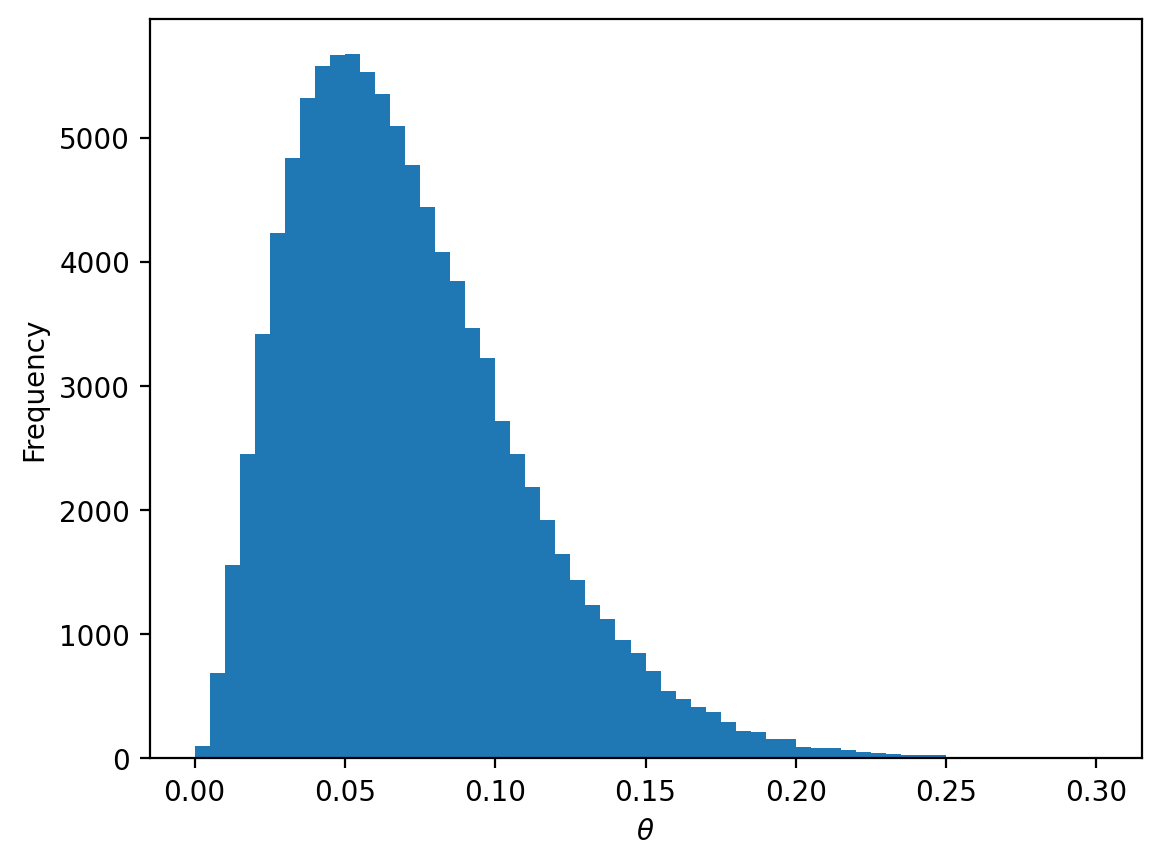

In [18]:
data = np.random.beta(3, 39, size=100000)
plt.hist(data, range=(0, 0.3), bins=60)
plt.xlabel(r'$\theta$')
plt.ylabel('Frequency')
plt.show()

„Ç¢„É™„Çπ„ÅÆ„É¨„Éù„Éº„Éà„ÅÆ„Éá„Ç∂„Ç§„É≥Ê°à„ÅÆ„ÇØ„É™„ÉÉ„ÇØÁéá„ÅÆÂ∑Æ„ÇíË°®„ÅôÁ¢∫ÁéáÂ§âÊï∞ ùõø „ÅÆ„Éí„Çπ„Éà„Ç∞„É©„É†

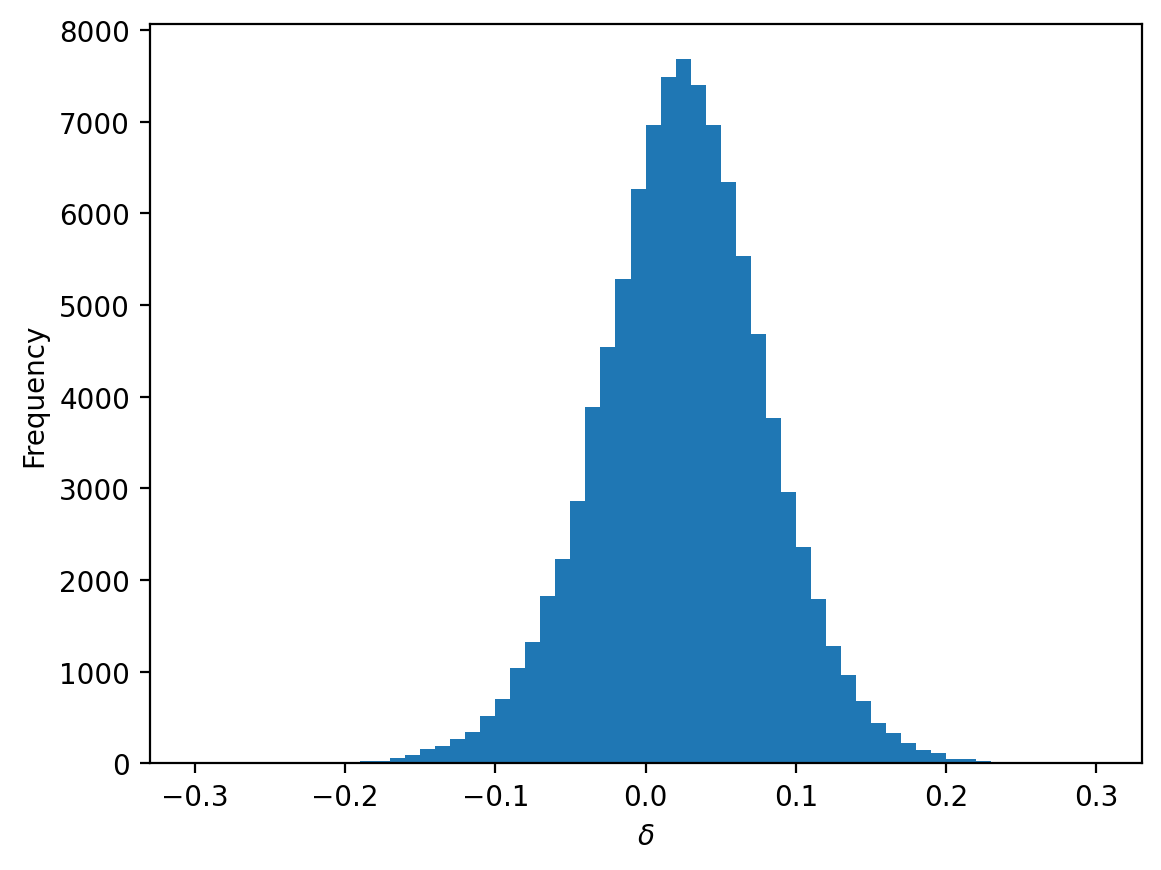

In [20]:
theta_a = np.random.beta(3, 39, size=100000)
theta_b = np.random.beta(5, 47, size=100000)
delta = theta_b - theta_a
plt.hist(delta, range=(-0.3, 0.3), bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel('Frequency')
plt.show()

In [21]:
print((delta > 0).mean())

0.68283


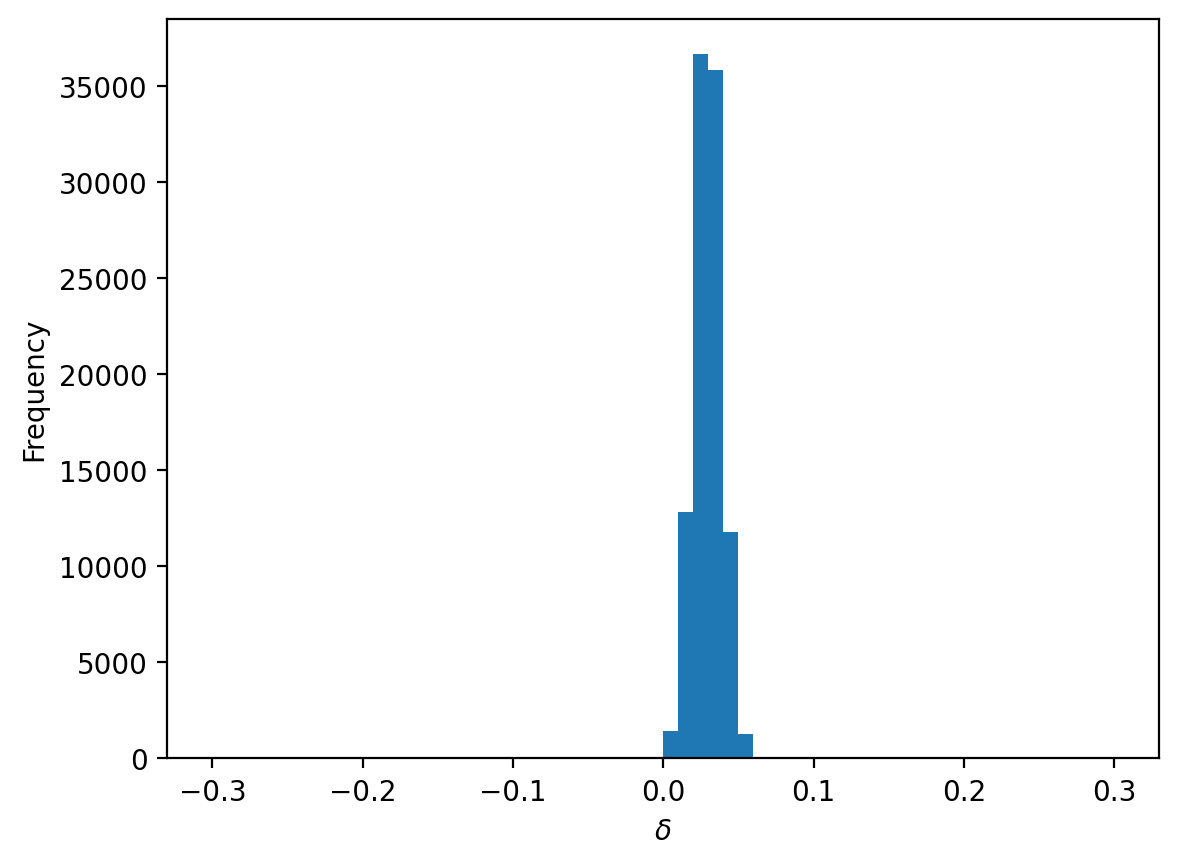

In [22]:
theta_a = np.random.beta(65, 1217, size=100000)
theta_b = np.random.beta(129, 1473, size=100000)
delta = theta_b - theta_a
plt.hist(delta, range=(-0.3, 0.3), bins=60)
plt.xlabel(r'$\delta$')
plt.ylabel('Frequency')
plt.show()

In [23]:
print((delta > 0).mean())

0.99934


„ÇØ„É™„ÉÉ„ÇØÁéá„ÅÆÂ∑Æ„ÅÆÁ¢∫ÁéáÂØÜÂ∫¶Èñ¢Êï∞ $p(\delta)$ „ÅÆÊé®Ë´ñÁµêÊûú„ÄÇ0‰ª•‰∏ä„ÅÆÈ†òÂüü„ÇíÁï∞„Å™„ÇãËâ≤„ÅßÁ§∫„Åó„Åü

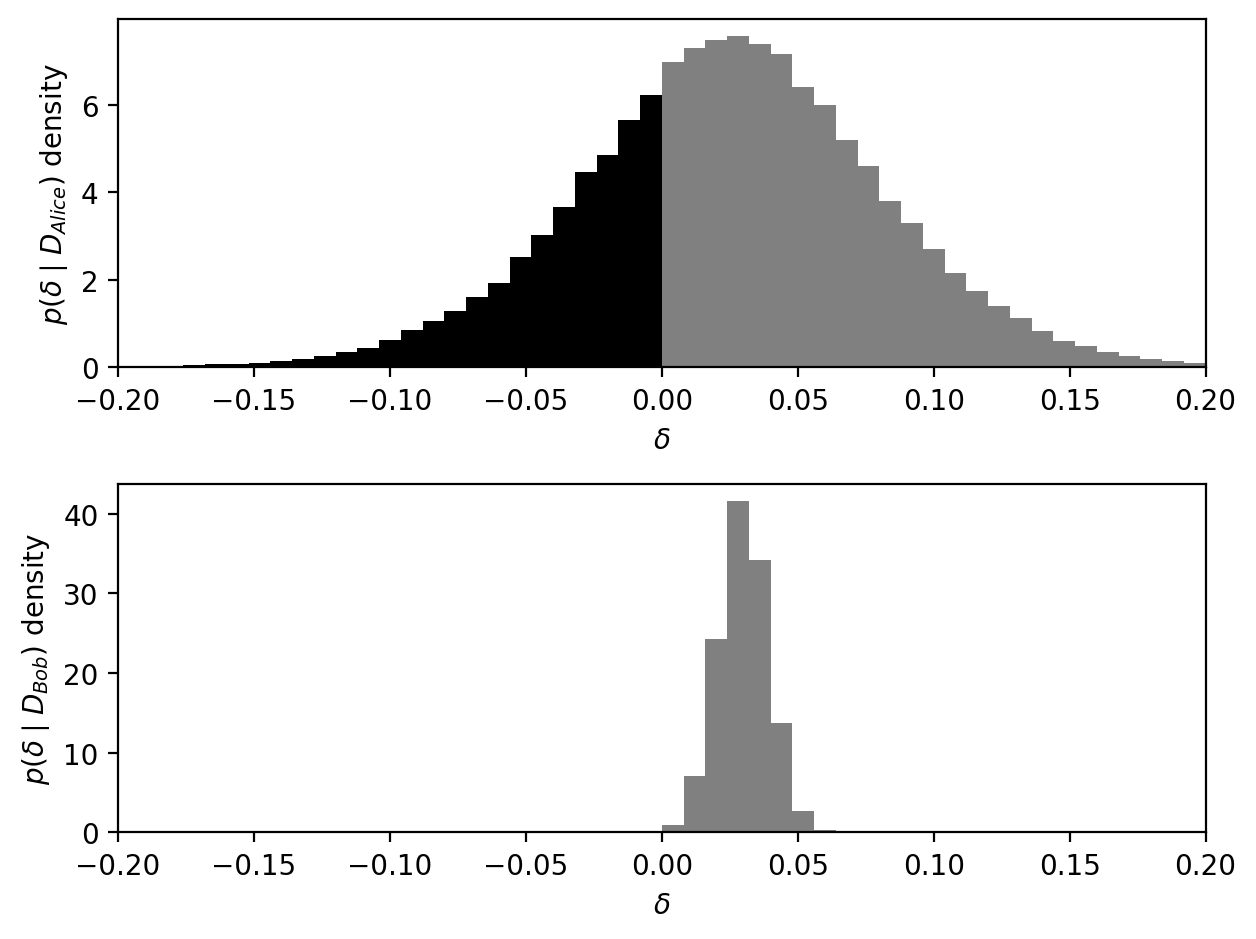

In [24]:
plt.subplot(2, 1, 1)
alice_a = np.random.beta(3, 39, size=100000)
alice_b = np.random.beta(5, 47, size=100000)
alice_delta = alice_b - alice_a
N, bins, patches = plt.hist(alice_delta, bins=50, range=(-0.2, 0.2), density=1, color='gray')
for i in np.where(bins < 0)[0]:
  patches[i].set_facecolor('black')
plt.xlim(-0.2, 0.2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$p(\delta\mid D_{Alice})$ density')

plt.subplot(2, 1, 2)
bob_a = np.random.beta(65, 1217, size=100000)
bob_b = np.random.beta(129, 1473, size=100000)
bob_delta = bob_b - bob_a
N, bins, patches = plt.hist(bob_delta, bins=50, range=(-0.2, 0.2), density=1,color='gray')
for i in np.where(bins < 0)[0]:
  patches[i].set_facecolor('black')
plt.xlim(-0.2, 0.2)
plt.xlabel(r'$\delta$')
plt.ylabel(r'$p(\delta\mid D_{Bob})$ density')
plt.tight_layout()